In [1]:
from tensorflow.keras.datasets import mnist

2023-05-20 06:25:26.356820: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-20 06:25:27.836941: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-20 06:25:27.836990: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-20 06:25:35.053474: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:
(train_images, train_labels),(test_images,test_labels)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(15,4)

<Figure size 1500x400 with 0 Axes>

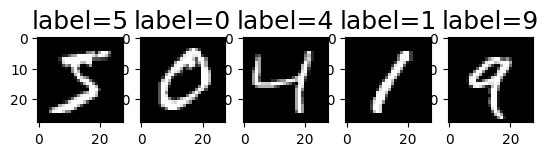

In [6]:
for i in range(5):
    ax=plt.subplot(1,5,i+1)
    ax.imshow(train_images[i],cmap='gray')
    ax.set_title('label='+str(train_labels[i]),fontsize=18)
plt.show()

In [8]:
train_images.shape

(60000, 28, 28)

In [10]:
x_train=train_images.reshape(60000,28*28)

In [11]:
x_train.shape

(60000, 784)

In [12]:
x_train=x_train.astype('float32')/255

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
x_test=test_images.reshape(10000,28*28)
x_test=x_test.astype('float32')/255

In [17]:
train_labels[0]

5

In [18]:
from keras.utils import to_categorical
y_train=to_categorical(train_labels)
y_test=to_categorical(test_labels)

In [19]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

model=model = tf.keras.Sequential()
model.add(Dense(512,activation='relu',input_dim=784))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [27]:
history=model.fit(x_train,y_train,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2610 - acc: 0.9260
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1053 - acc: 0.9683
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0709 - acc: 0.9789
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0508 - acc: 0.9844
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0388 - acc: 0.9883


In [28]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Accuracy=',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0646 - acc: 0.9800
Accuracy= 0.9800000190734863
